# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&q=" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | porto novo
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | walla walla
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | lagoa
Processing Record 8 of Set 1 | trofors
Processing Record 9 of Set 1 | fairbanks
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | ostrovnoy
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | houma
Processi

City not found. Skipping...
Processing Record 34 of Set 4 | ola
Processing Record 35 of Set 4 | vigrestad
Processing Record 36 of Set 4 | sterling
Processing Record 37 of Set 4 | homer
Processing Record 38 of Set 4 | mazarron
Processing Record 39 of Set 4 | ornskoldsvik
Processing Record 40 of Set 4 | aklavik
Processing Record 41 of Set 4 | buraydah
Processing Record 42 of Set 4 | souillac
Processing Record 43 of Set 4 | tidore
City not found. Skipping...
Processing Record 44 of Set 4 | san patricio
Processing Record 45 of Set 4 | savannah bight
Processing Record 46 of Set 4 | boulsa
Processing Record 47 of Set 4 | fortuna
Processing Record 48 of Set 4 | rongcheng
Processing Record 49 of Set 4 | iqaluit
Processing Record 0 of Set 5 | petatlan
Processing Record 1 of Set 5 | batagay-alyta
Processing Record 2 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 3 of Set 5 | emba
Processing Record 4 of Set 5 | kokstad
Processing Record 5 of Set 5 | garowe
Processing Record 6 of Set 5 | a

Processing Record 21 of Set 8 | barbar
City not found. Skipping...
Processing Record 22 of Set 8 | prior lake
Processing Record 23 of Set 8 | sao raimundo das mangabeiras
Processing Record 24 of Set 8 | bhagwantnagar
Processing Record 25 of Set 8 | cockburn town
Processing Record 26 of Set 8 | beloha
Processing Record 27 of Set 8 | nhulunbuy
Processing Record 28 of Set 8 | fort-shevchenko
Processing Record 29 of Set 8 | sabang
Processing Record 30 of Set 8 | tubruq
City not found. Skipping...
Processing Record 31 of Set 8 | egvekinot
Processing Record 32 of Set 8 | caucaia
Processing Record 33 of Set 8 | tabulbah
City not found. Skipping...
Processing Record 34 of Set 8 | hami
Processing Record 35 of Set 8 | general roca
Processing Record 36 of Set 8 | umm lajj
Processing Record 37 of Set 8 | nouadhibou
Processing Record 38 of Set 8 | malakal
Processing Record 39 of Set 8 | san nicolas
Processing Record 40 of Set 8 | hillsborough
Processing Record 41 of Set 8 | ndouci
City not found. S

Processing Record 5 of Set 12 | meyungs
City not found. Skipping...
Processing Record 6 of Set 12 | lask
Processing Record 7 of Set 12 | gladstone
Processing Record 8 of Set 12 | darnah
Processing Record 9 of Set 12 | ahuimanu
Processing Record 10 of Set 12 | mazyr
Processing Record 11 of Set 12 | caravelas
Processing Record 12 of Set 12 | lasa
Processing Record 13 of Set 12 | cayenne
Processing Record 14 of Set 12 | aleppo
Processing Record 15 of Set 12 | kasongo
Processing Record 16 of Set 12 | kaduqli
Processing Record 17 of Set 12 | nicoya
Processing Record 18 of Set 12 | tebingtinggi
Processing Record 19 of Set 12 | marica
Processing Record 20 of Set 12 | saint-pierre
Processing Record 21 of Set 12 | khilok
Processing Record 22 of Set 12 | luanda
Processing Record 23 of Set 12 | zyryanka
Processing Record 24 of Set 12 | nagato
Processing Record 25 of Set 12 | la ligua
Processing Record 26 of Set 12 | lanzhou
Processing Record 27 of Set 12 | ryotsu
Processing Record 28 of Set 12 | 

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,298.64,83,92,13.08,PF,1678562661
1,carnarvon,-24.8667,113.6333,297.17,76,0,10.76,AU,1678562792
2,porto novo,6.4965,2.6036,301.05,76,99,3.53,BJ,1678562894
3,hermanus,-34.4187,19.2345,289.15,63,62,3.05,ZA,1678562682
4,walla walla,46.0646,-118.3430,285.29,48,75,2.24,US,1678562914


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,298.64,83,92,13.08,PF,1678562661
1,carnarvon,-24.8667,113.6333,297.17,76,0,10.76,AU,1678562792
2,porto novo,6.4965,2.6036,301.05,76,99,3.53,BJ,1678562894
3,hermanus,-34.4187,19.2345,289.15,63,62,3.05,ZA,1678562682
4,walla walla,46.0646,-118.3430,285.29,48,75,2.24,US,1678562914


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

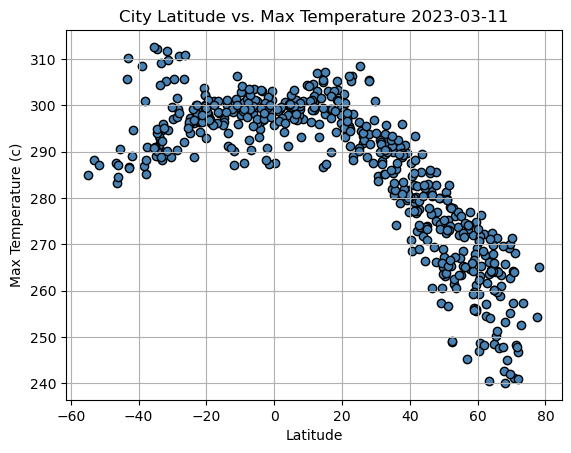

In [46]:
# Build scatter plot for latitude vs. temperature
today = date.today()
plt.scatter(x='Lat', y='Max Temp', data=city_data_df, c='steelblue', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature '+ str(today))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (c)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

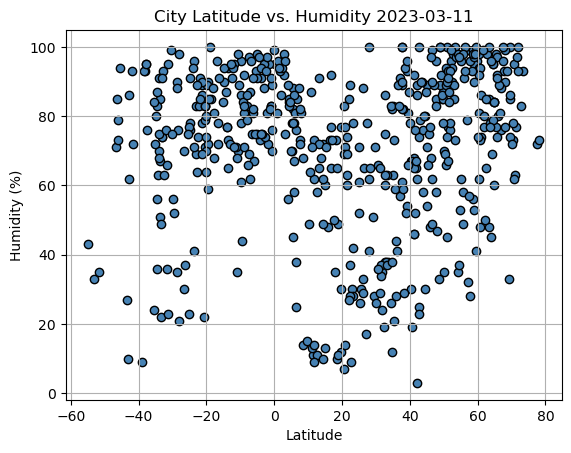

In [47]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x='Lat', y='Humidity', data=city_data_df, c='steelblue', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity '+ str(today))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

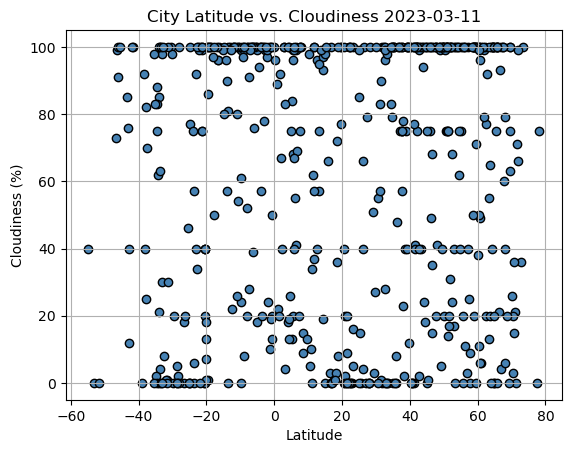

In [48]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x='Lat', y='Cloudiness', data=city_data_df, c='steelblue', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness '+ str(today))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

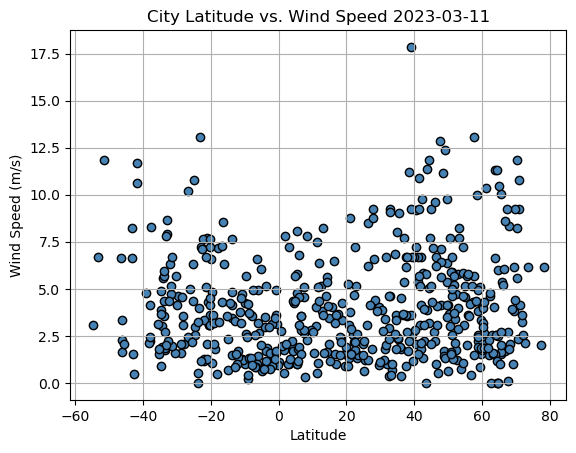

In [45]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x='Lat', y='Wind Speed', data=city_data_df, c='steelblue', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed '+ str(today))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def lin_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,xy=(0.05, 0.25), xycoords='axes fraction',fontsize=15,color="red")
    print(f'The r-value is: {rvalue}')
    

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,porto novo,6.4965,2.6036,301.05,76,99,3.53,BJ,1678562894
4,walla walla,46.0646,-118.3430,285.29,48,75,2.24,US,1678562914
5,lagoa,39.0500,-27.9833,289.64,93,100,17.85,PT,1678563191
6,trofors,65.5333,13.4063,264.08,98,100,1.52,NO,1678563192
7,fairbanks,64.8378,-147.7164,260.15,84,0,0.00,US,1678563000


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,298.64,83,92,13.08,PF,1678562661
1,carnarvon,-24.8667,113.6333,297.17,76,0,10.76,AU,1678562792
3,hermanus,-34.4187,19.2345,289.15,63,62,3.05,ZA,1678562682
10,busselton,-33.6500,115.3333,290.38,67,100,1.75,AU,1678562686
11,puerto ayora,-0.7393,-90.3518,303.13,76,50,4.92,EC,1678563194


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8909840595538214


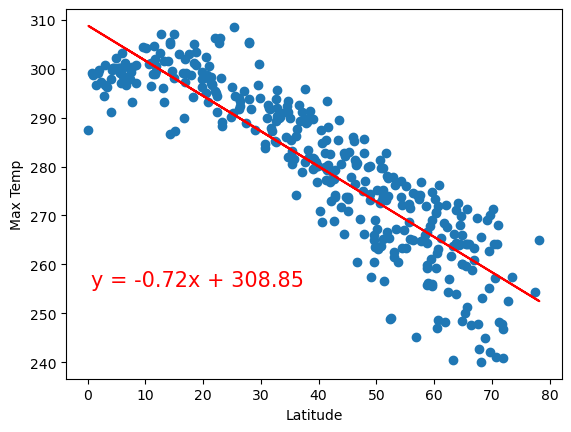

In [37]:
# Linear regression on Northern Hemisphere
lin_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.2961505206762799


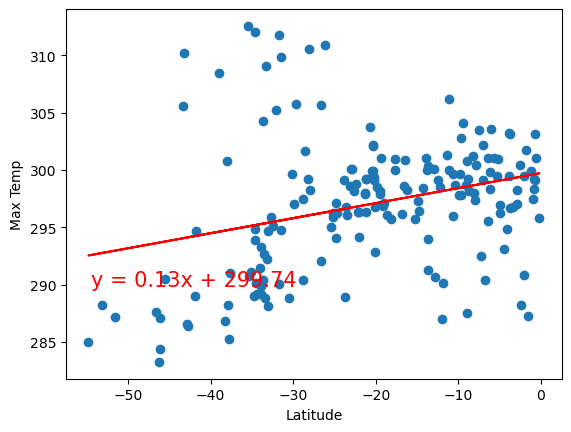

In [38]:
# Linear regression on Southern Hemisphere
lin_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:**
For northern hemisphere, the max temperature and the latitude has a negative correlation, which the max temp decreases with higher latitude.
For southern hemisphere, the max temperature and the latitude has a positive correlation, which the max temp increases with higher latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.31195718968575475


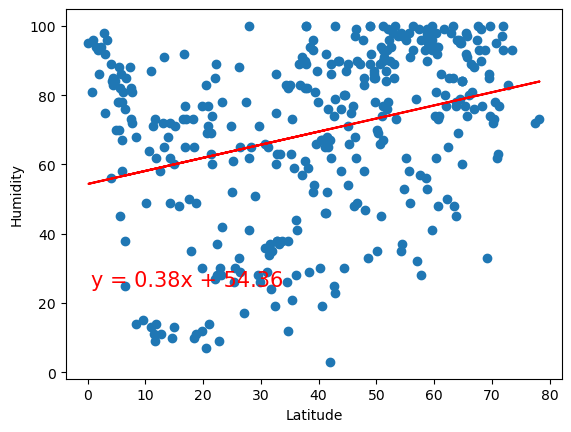

In [49]:
# Northern Hemisphere
lin_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.36326928798376035


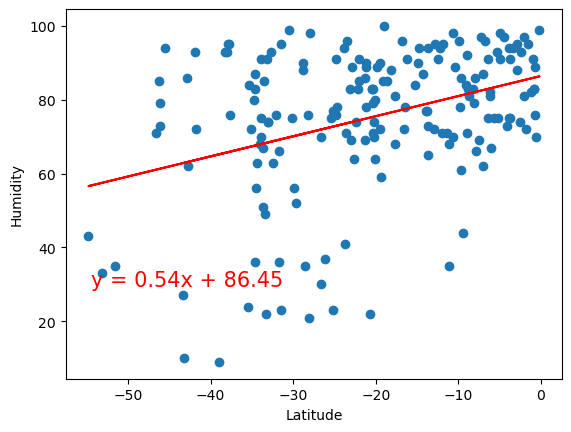

In [50]:
# Southern Hemisphere
lin_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:**
For both northern and southern hemisphere, the latitude and humidity has a positive correlation, which the humidity increases with higher latitude. However, both linear regressions have a R-value nearly euqals to 0.3, indicating that the two variables don't have a strong correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08878475301046321


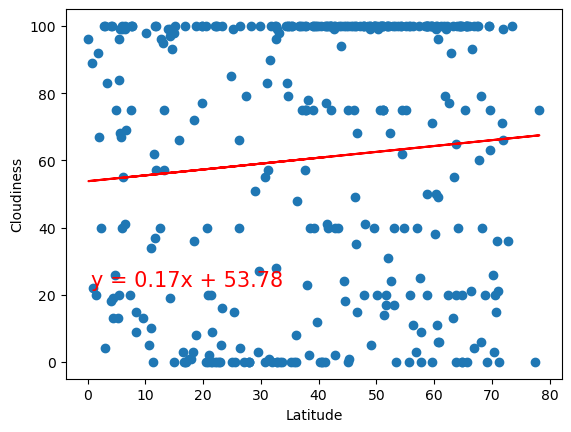

In [51]:
# Northern Hemisphere
lin_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.2494950397713744


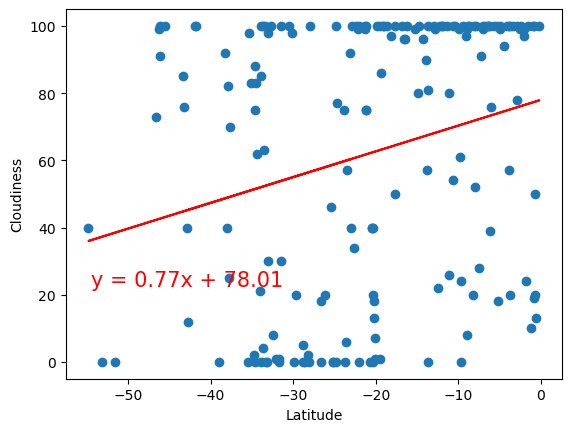

In [52]:
# Southern Hemisphere
lin_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** 
For both northern and southern hemisphere, the linear regressions between the latitude and cloudiness have low R-values, approximate 0.09 and 0.24; the scatter plots also have a disperse pattern, indiciating the two variables have a week correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.14583957626494598


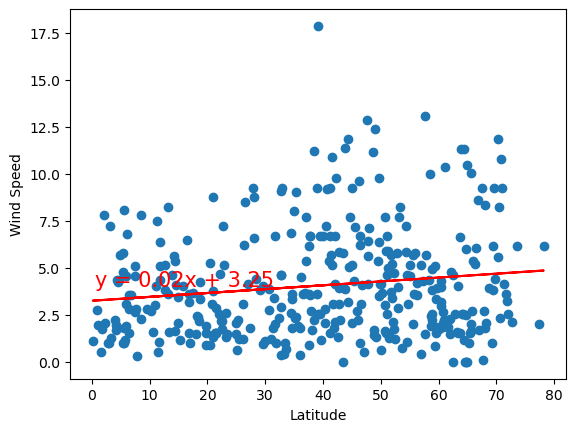

In [53]:
# Northern Hemisphere
lin_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: -0.3300572438382172


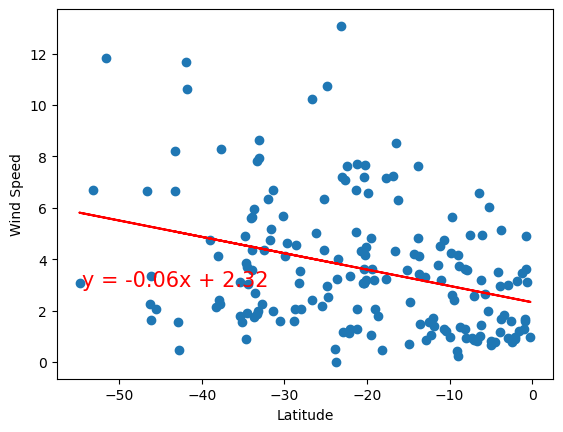

In [54]:
# Southern Hemisphere
lin_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:**
For northern hemisphere, the latitude and the wind speed has a positive correlation, which the wind speed increases with higher latitude, but the regression has a low R-value of 0.15, indicating the two variabls don't have a strong correlation. For southern hemisphere, the latitude and the wind speed has a negative correlation, which the wind speed decreases with higher latitude.